In [1]:
!ls

notebook.ipynb        test.csv
sample_submission.csv train.csv


In [75]:
import seaborn as sns
%matplotlib inline

In [48]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
    
predicted_y = np.random.randint(100, size = 1000)
desired_y = np.random.randint(100, size = 1000)

print (normalized_gini(predicted_y, desired_y))

# Functions

In [64]:
def gini(list_of_values):
    sorted_list = sorted(list(list_of_values))
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2
    return (fair_area - area) / fair_area
  
def normalized_gini(y_pred, y):
    normalized_gini = gini(y_pred)/gini(y)
    return normalized_gini

____

In [46]:
TARGET = 'target'
RANDOM_STATE = 42

df = pd.read_csv("train.csv", index_col='id')
y = df.loc[:,TARGET]
X = df.loc[:,~df.columns.isin([TARGET])]

In [ ]:
clf_LR = LogisticRegression()

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=RANDOM_STATE)

In [63]:
clf_LR.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
clf_XGB = xgb.XGBClassifier(seed=RANDOM_STATE)

In [67]:
y_pred = clf_LR.predict_proba(X_test)[:,1]

In [68]:
normalized_gini(y_pred, y_test)

0.23877556708197628

In [70]:
clf_XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [71]:
y_pred = clf_XGB.predict_proba(X_test)[:,1]

In [72]:
normalized_gini(y_pred, y_test)

0.24358883038193047

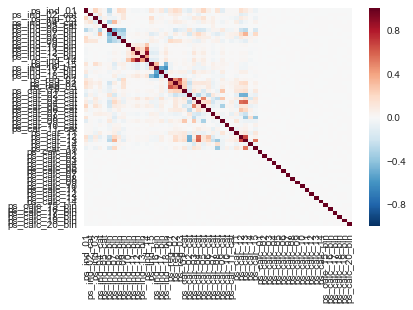

In [80]:
ax = sns.heatmap(X.corr())

In [ ]:
clf_XGB.fit